# Task 1

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def PCA(img_train):
    mean = img_train.mean(axis=0)
    img_train -= mean
    cov = np.cov(img_train.T)
    eigen_value, feature_vector = np.linalg.eig(cov)
    return eigen_value, feature_vector

#####  KNN  calculate,    K=1

In [3]:
# calculate Euc distanse, distanse = (X-Y)^2  = X^2  + Y^2 - 2XY 
def distance(X_test, X_train):
    num_test = X_test.shape[1]
    num_train = X_train.shape[1]
    distances = np.zeros((num_test, num_train))
    XY2 = np.multiply(np.dot(X_test.T,X_train), -2)    # -2 XY
    X2 = np.sum(np.square(X_test.T), axis=1, keepdims=True)    # X^2
    Y2 = np.sum(np.square(X_train), axis=0,keepdims=True)    # Y^2
    distances = np.sqrt(XY2 + X2 + Y2)
    return distances


def predict(X_test, X_train, Y_train, k = 1):
    """ 
    X_test:   dataset for test    shape(n_samples, img_h*img_w)
    X_train   dataset for train   shape(n_samples, img_h*img_w)
    Y_train   label of X_train    shape(1, n_samples)
    k: KNN parameter ,here k=1.
    Y_prediction:  predicted label of X_test
    """
    distances = distance(X_test, X_train)
    num_test = X_test.shape[1]
    Y_prediction = np.zeros(num_test)
    for i in range(num_test):
        # argsort distances
        dists_min_k = np.argsort(distances[i])[:k]
        # get label of top k
        y_labels_k = Y_train[0,dists_min_k]
        Y_prediction[i] = np.argmax(np.bincount(y_labels_k))

    return Y_prediction, distances

##### 5 kf validation

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


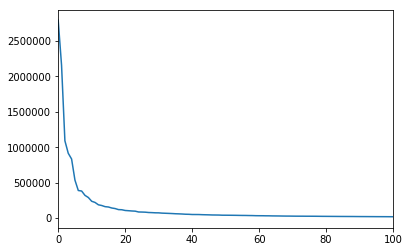

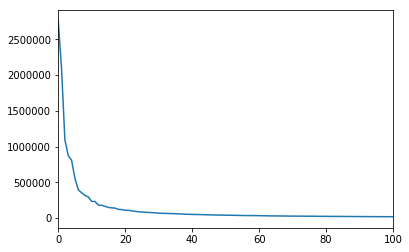

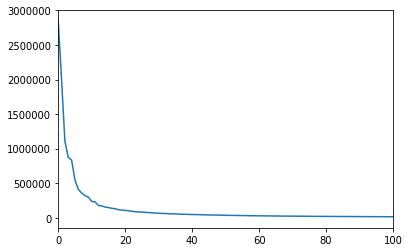

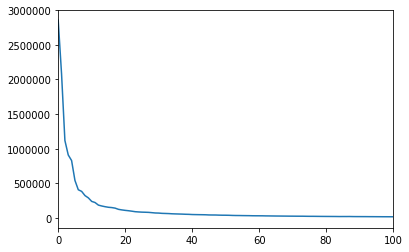

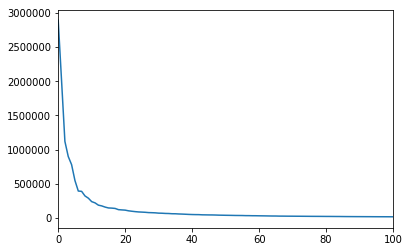

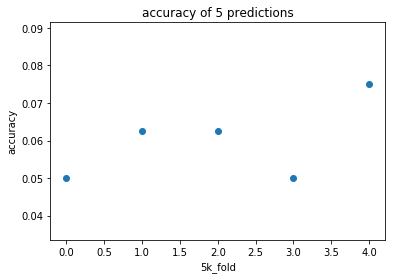

In [5]:
accuracy = []
img_h = 112
img_w = 92
for t in [[1,2],[3,4], [5,6], [7,8], [9,10]]:
    test = t
    train = [i for i in range(1,11) if i not in test]
    train_x = np.zeros((40*8 ,img_h*img_w))
    train_y = []
    cnt = 0
    for i in train:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            train_x[cnt, :] = img.reshape(-1)
            cnt += 1
            train_y.append(p)
    train_y = np.array(train_y).reshape(1,-1)
    test_x = np.zeros((40*2 ,img_h*img_w))
    test_y = []
    cnt = 0
    for i in test:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            test_x[cnt, :] = img.reshape(-1)
            cnt += 1
            test_y.append(p)
    test_y = np.array(test_y)
    
    
    #  PCA 
    eigen_value, feature_vector = PCA(train_x)
    # plot eigen_value
    plt.plot(range(len(eigen_value)), eigen_value)
    plt.xlim(0,100)
    plt.show()
    # so, cut value as 10.
    cut_down_value = 10
    feature_vector = feature_vector[:, :cut_down_value]
    #  reduce the dimensionality of images of train
    reduced_dim_train_x = train_x @ feature_vector
    #  reduce the dimensionality of images of test
    reduced_dim_test_x = test_x @ feature_vector
    
    # predict
    y_prediction, _ = predict(reduced_dim_test_x.T, reduced_dim_train_x.T, train_y, k=1)
    right = 0
    for i in range(len(y_prediction)):
        if y_prediction[i] == test_y[i]:
            right += 1
    accuracy.append(right/len(y_prediction))
#     break
plt.scatter(range(len(accuracy)), accuracy)
plt.xlabel('5k_fold')
plt.ylabel('accuracy')
plt.title('accuracy of 5 predictions')
plt.show()

##### average accuracy = 6%,  cost 1h

#  Task2.     Resize to 56*46 pixels

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


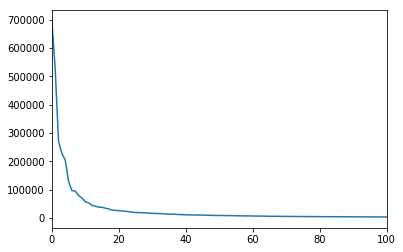

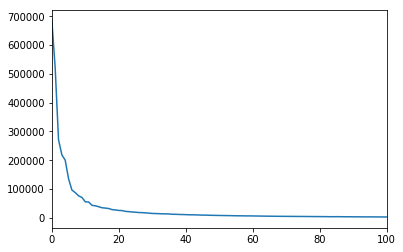

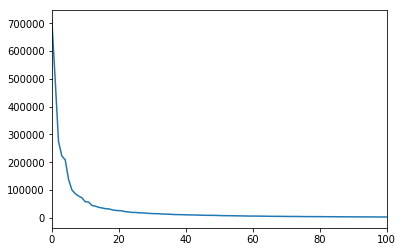

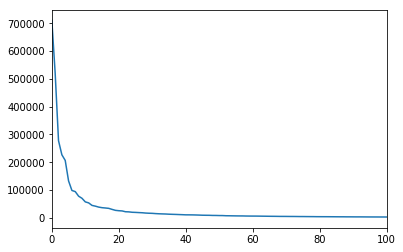

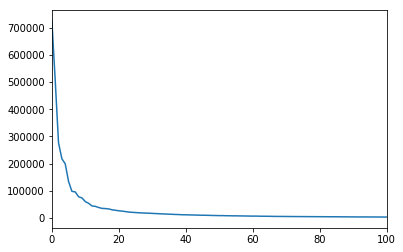

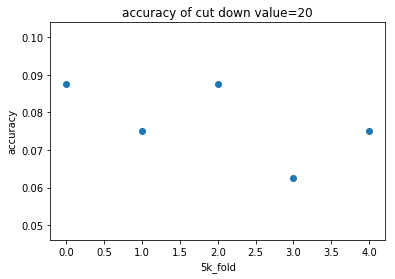

In [4]:
accuracy = []
img_h = int(112/2)
img_w = int(92/2)
for t in [[1,2],[3,4], [5,6], [7,8], [9,10]]:
    test = t
    train = [i for i in range(1,11) if i not in test]
    train_x = np.zeros((40*8 ,img_h*img_w))
    train_y = []
    cnt = 0
    for i in train:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            train_x[cnt,:] = img.reshape(-1)
            cnt += 1
            train_y.append(p)
    train_y = np.array(train_y).reshape(1,-1)

    test_x = np.zeros((40*2 ,img_h*img_w))
    test_y = []
    cnt = 0
    for i in test:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            test_x[cnt, :] = img.reshape(-1)
            cnt += 1
            test_y.append(p)
    test_y = np.array(test_y)
    
    
    #  PCA 
    eigen_value, feature_vector = PCA(train_x)

    
    # plot eigen_value
    plt.plot(range(len(eigen_value)), eigen_value)
    plt.xlim(0,100)
    plt.show()
    # so, cut value as 20.
    cut_down_value = 20
    
    feature_vector = feature_vector[:, :cut_down_value]
    # reduce the dimensionality of images of train
    reduced_dim_train_x = train_x @ feature_vector
    #  reduce the dimensionality of images of test
    reduced_dim_test_x = test_x @ feature_vector
    
    
    # predict
    y_prediction, _ = predict(reduced_dim_test_x.T, reduced_dim_train_x.T, train_y, k=1)
    right = 0
    for i in range(len(y_prediction)):
        if y_prediction[i] == test_y[i]:
            right += 1
    accuracy.append(right/len(y_prediction))
    
#     break
plt.scatter(range(len(accuracy)), accuracy)
plt.xlabel('5k_fold')
plt.ylabel('accuracy')
plt.title('accuracy of cut down value=%s' % cut_down_value)
plt.show()

##### so,  after resize image,   average accuracy = 8%,  similar to task1, but much more faster

   # Task3    LDA

In [6]:
def linear_discriminant_analysis(train_x, train_y):
    '''
    parameter
    train_x: (n_samples, n_features)
    train_y:  classes of train_x
    output_dim: target dimension
    return: output shape:(n_samples, output_dim)
    '''
    clusters = np.unique(train_y)
    
    # within_class scatter matrix
    scatter_w = np.zeros((train_x.shape[1],train_x.shape[1]))
    for i in clusters:
        datai = train_x[train_y == i]
        datai = datai-datai.mean(0)
        wi = np.mat(datai).T * np.mat(datai)
        scatter_w += wi

    #between_class scatter matrix
    sw_b = np.zeros((train_x.shape[1], train_x.shape[1]))
    # average
    u = train_x.mean(0)
    for i in clusters:
        Ni = train_x[train_y == i].shape[0]
        ui = train_x[train_y == i].mean(0)
        sw_bi = Ni * np.mat(ui - u).T * np.mat(ui - u)
        sw_b += sw_bi
    scatter = np.linalg.inv(scatter_w) * sw_b
    
    # calculate eig_value and eig_feature
    eig_value,eig_feature = np.linalg.eig(scatter)  
    
    return eig_value,eig_feature


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


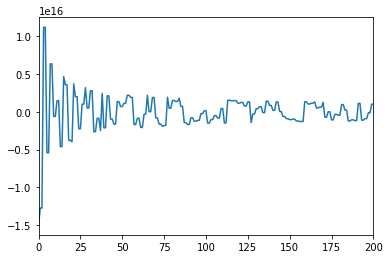

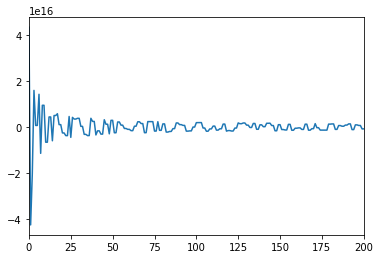

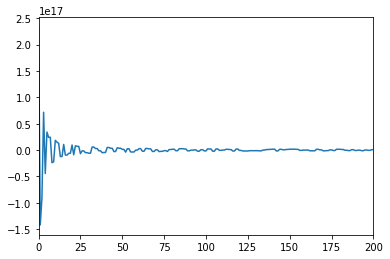

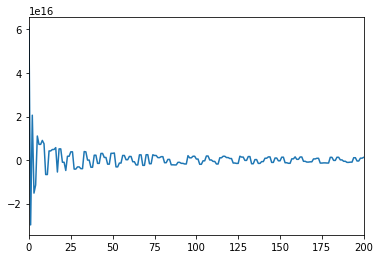

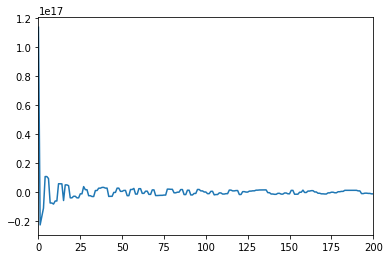

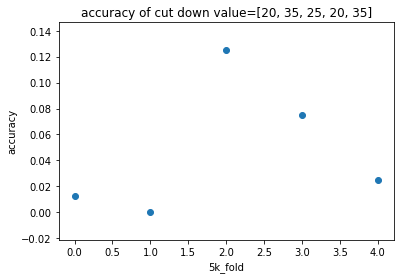

In [7]:
accuracy = []
img_h = 112
img_w = 92

cut_count = 0

# must <= 40
cut_down_value = [20, 35, 25, 20, 35]


for t in [[1,2],[3,4], [5,6], [7,8], [9,10]]:
    test = t
    train = [i for i in range(1,11) if i not in test]
    train_x = np.zeros((40*8 ,img_h*img_w))
    train_y = []
    cnt = 0
    for i in train:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            train_x[cnt,:] = img.reshape(-1)
            cnt += 1
            train_y.append(p)
            
    train_y_1 = np.array(train_y).reshape(1,-1)

    test_x = np.zeros((40*2 ,img_h*img_w))
    test_y = []
    cnt = 0
    for i in test:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            test_x[cnt, :] = img.reshape(-1)
            cnt += 1
            test_y.append(p)
    test_y = np.array(test_y)
    
    
    #  LDA
    eigen_value, feature_vector = linear_discriminant_analysis(train_x, train_y)
    # plot eigen_value
    plt.plot(range(len(eigen_value)), eigen_value)
    plt.xlim(0,200)
    plt.show()
    # so, cut value as 10.
    
    cut = cut_down_value[cut_count]
    cut_count += 1
    eigen_value_sorted = np.argsort(eigen_value)
    eig_value_cut = eigen_value_sorted[:(-cut -1):-1]
    feature_vector = feature_vector[:, eig_value_cut]
    
    reduced_dim_train_x = train_x @ feature_vector
    reduced_dim_test_x = test_x @ feature_vector
    
    
    # predict
    y_prediction, _ = predict(reduced_dim_test_x.T, reduced_dim_train_x.T, train_y_1, k=1)
    right = 0
    for i in range(len(y_prediction)):
        if y_prediction[i] == test_y[i]:
            right += 1
    accuracy.append(right/len(y_prediction))
#     break
plt.scatter(range(len(accuracy)), accuracy)
plt.xlabel('5k_fold')
plt.ylabel('accuracy')
plt.title('accuracy of cut down value=%s' % cut_down_value)
plt.show()

#####  LDA   average accuracy = 20%, much better than PCA

# Task4    56*46pixels

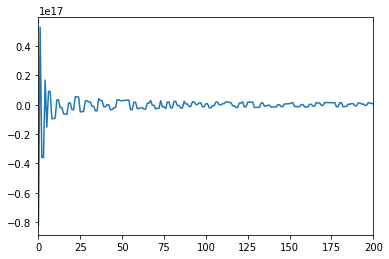

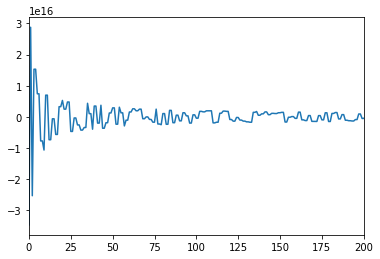

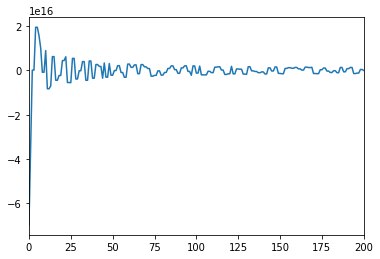

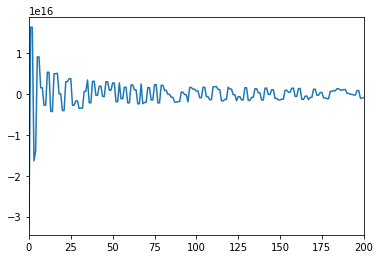

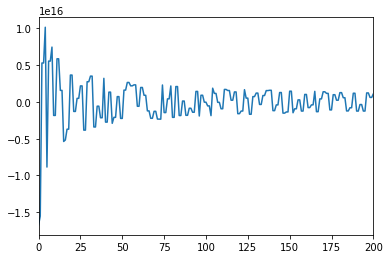

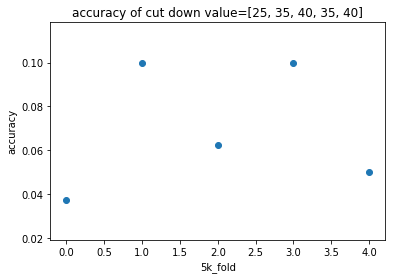

In [14]:
accuracy = []
img_h = int(112/2)
img_w = int(92/2)


cut_count = 0
# must <= 40,  2 4  
cut_down_value = [25, 35, 40, 35, 40]


for t in [[1,2],[3,4], [5,6], [7,8], [9,10]]:
    test = t
    train = [i for i in range(1,11) if i not in test]
    train_x = np.zeros((40*8 ,img_h*img_w))
    train_y = []
    cnt = 0
    for i in train:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            train_x[cnt,:] = img.reshape(-1)
            cnt += 1
            train_y.append(p)
            
    train_y_1 = np.array(train_y).reshape(1,-1)

    test_x = np.zeros((40*2 ,img_h*img_w))
    test_y = []
    cnt = 0
    for i in test:
        for p in range(1,41):
            img_name = "%s_%s.png" % (p, i)
            img = cv2.imread("ATT/%s" % img_name, 0).astype(np.float64)
            img = cv2.resize(img, (img_w ,img_h))
            test_x[cnt, :] = img.reshape(-1)
            cnt += 1
            test_y.append(p)
    test_y = np.array(test_y)
    
    
    #  LDA
    eigen_value, feature_vector = linear_discriminant_analysis(train_x, train_y)
    # plot eigen_value
    plt.plot(range(len(eigen_value)), eigen_value)
    plt.xlim(0,200)
    plt.show()
    
    cut = cut_down_value[cut_count]
    cut_count += 1
    eigen_value_sorted = np.argsort(eigen_value)
    eig_value_cut = eigen_value_sorted[:(-cut -1):-1]
    feature_vector = feature_vector[:, eig_value_cut]
    
    reduced_dim_train_x = train_x @ feature_vector
    reduced_dim_test_x = test_x @ feature_vector
    
    
    # predict
    y_prediction, _ = predict(reduced_dim_test_x.T, reduced_dim_train_x.T, train_y_1, k=1)
    right = 0
    for i in range(len(y_prediction)):
        if y_prediction[i] == test_y[i]:
            right += 1
    accuracy.append(right/len(y_prediction))
#     break
plt.scatter(range(len(accuracy)), accuracy)
plt.xlabel('5k_fold')
plt.ylabel('accuracy')
plt.title('accuracy of cut down value=%s' % cut_down_value)
plt.show()

##### LDA,    56*46pixels,    average accuracy = 12% ,better than PCA